In [212]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
import os

In [3]:
# Load dataset
data = pd.read_excel(~'Input Model Building.xlsx')
data.head()

,Years,Month,Month-Year,China,Hong Kong SAR,India,Indonesia,Japan,Malaysia,Philippines,Grand Total
0,2014,Jan,Jan-2014,188237,41909,65557,284126,59578,89482,43702,772591
1,2014,Feb,Feb-2014,203600,48440,62999,219036,69230,91181,44539,739025
2,2014,Mar,Mar-2014,165642,43218,70488,246308,85946,107002,57050,775654
3,2014,Apr,Apr-2014,126507,69675,79536,230236,50751,94982,73558,725245
4,2014,May,May-2014,95987,47859,118953,267714,54173,100648,76976,762310


In [4]:
data['Month-Year'] = pd.to_datetime(data['Month-Year'])
data.set_index('Month-Year', inplace=True)

In [37]:
data.head() 

,Years,Month,China,Hong Kong SAR,India,Indonesia,Japan,Malaysia,Philippines,Grand Total
Month-Year,,,,,,,,,,
2014-01-01,2014,Jan,188237,41909,65557,284126,59578,89482,43702,772591
2014-02-01,2014,Feb,203600,48440,62999,219036,69230,91181,44539,739025
2014-03-01,2014,Mar,165642,43218,70488,246308,85946,107002,57050,775654
2014-04-01,2014,Apr,126507,69675,79536,230236,50751,94982,73558,725245
2014-05-01,2014,May,95987,47859,118953,267714,54173,100648,76976,762310


In [83]:
# Select the specific column for modeling 
selected_column = 'Grand Total' 
selected_data = data[[selected_column]]

In [84]:
selected_data

,Grand Total
Month-Year,
2014-01-01,772591
2014-02-01,739025
2014-03-01,775654
2014-04-01,725245
2014-05-01,762310
...,...
2019-08-01,1061585
2019-09-01,868556
2019-10-01,914099


In [85]:
# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_data)

In [86]:
scaled_data[:2]

array([[0.30292232],
       [0.22678287]])

In [517]:
# Split the data into sequences for time series modeling (assuming each month is a sequence)
sequence_length = 12 
sequences = []
for i in range(len(scaled_data) - sequence_length):
    sequences.append(scaled_data[i:i+sequence_length])
sequences = np.array(sequences)

In [518]:
# Splitting data into train and test sets (85-15 split)
split = int(0.85 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

In [519]:
train_data[:2]

array([[[0.3166124 ],
        [0.36688646],
        [0.24267225],
        [0.11460641],
        [0.0147324 ],
        [0.        ],
        [0.29179443],
        [0.27051393],
        [0.04677913],
        [0.13910369],
        [0.13170149],
        [0.10841501]],

       [[0.36688646],
        [0.24267225],
        [0.11460641],
        [0.0147324 ],
        [0.        ],
        [0.29179443],
        [0.27051393],
        [0.04677913],
        [0.13910369],
        [0.13170149],
        [0.10841501],
        [0.16055435]]])

In [520]:
test_data[:2]

array([[[0.65328468],
        [0.56716462],
        [0.4929365 ],
        [0.88202628],
        [0.94449335],
        [0.48542631],
        [0.51108202],
        [0.42072746],
        [0.48009228],
        [0.74975539],
        [0.81177087],
        [0.68303091]],

       [[0.56716462],
        [0.4929365 ],
        [0.88202628],
        [0.94449335],
        [0.48542631],
        [0.51108202],
        [0.42072746],
        [0.48009228],
        [0.74975539],
        [0.81177087],
        [0.68303091],
        [0.68921249]]])

In [521]:
# Prepare train and test data - input and output
X_train = train_data[:, :-1]
y_train = train_data[:, -1]

X_test = test_data[:, :-1]
y_test = test_data[:, -1]

# Reshape input data to fit model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [522]:
X_train[:2],y_train[:2],X_test[:2],y_test[:2]

(array([[[0.3166124 ],
         [0.36688646],
         [0.24267225],
         [0.11460641],
         [0.0147324 ],
         [0.        ],
         [0.29179443],
         [0.27051393],
         [0.04677913],
         [0.13910369],
         [0.13170149]],
 
        [[0.36688646],
         [0.24267225],
         [0.11460641],
         [0.0147324 ],
         [0.        ],
         [0.29179443],
         [0.27051393],
         [0.04677913],
         [0.13910369],
         [0.13170149],
         [0.10841501]]]),
 array([[0.10841501],
        [0.16055435]]),
 array([[[0.65328468],
         [0.56716462],
         [0.4929365 ],
         [0.88202628],
         [0.94449335],
         [0.48542631],
         [0.51108202],
         [0.42072746],
         [0.48009228],
         [0.74975539],
         [0.81177087]],
 
        [[0.56716462],
         [0.4929365 ],
         [0.88202628],
         [0.94449335],
         [0.48542631],
         [0.51108202],
         [0.42072746],
         [0.48009228],
  

### Ensuring more reproducible results across different runs

In [523]:
# Set seed values for reproducibility
seed_value = 42
# 1. Set Python built-in random number generator
random.seed(seed_value)
# 2. Set NumPy random seed
np.random.seed(seed_value)
# 3. Set TensorFlow random seed
tf.random.set_seed(seed_value)
# 4. Force TensorFlow to use single thread for better reproducibility
os.environ['TF_DETERMINISTIC_OPS'] = '1'

### Four Deep Learning Models
1.	Vanilla RNN (Vanilla Recurrent Neural Network)
2.	Bidirectional RNN (Bidirectional Recurrent Neural Network)
3.	LSTM (Long Short-Term Memory)
4.	GRU (Gated Recurrent Unit)

In [524]:
#model = Sequential()
#model.add(LSTM(units=10, activation='relu', input_shape=(X_train.shape[1], 1)))
#model.add(Dense(units=1))  # Output layer for single value prediction

#model = Sequential()
#model.add(Bidirectional(LSTM(units=50, activation='relu'), input_shape=(X_train.shape[1], 1)))
#model.add(Dense(units=1))

model = Sequential()
model.add(SimpleRNN(units=100, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

#model = Sequential()
#model.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
#model.add(Dense(units=1))

In [525]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)
# Make predictions
predicted_values = model.predict(X_test)

Epoch 1/50
2/2 [==============================] - 1s 4ms/step - loss: 0.1700
Epoch 2/50
2/2 [==============================] - 0s 3ms/step - loss: 0.1041
Epoch 3/50
2/2 [==============================] - 0s 5ms/step - loss: 0.0554
Epoch 4/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0339
Epoch 5/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0462
Epoch 6/50
2/2 [==============================] - 0s 3ms/step - loss: 0.0390
Epoch 7/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0297
Epoch 8/50
2/2 [==============================] - 0s 5ms/step - loss: 0.0302
Epoch 9/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0296
Epoch 10/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0325
Epoch 11/50
2/2 [==============================] - 0s 5ms/step - loss: 0.0327
Epoch 12/50
2/2 [==============================] - 0s 5ms/step - loss: 0.0293
Epoch 13/50
2/2 [==============================] - 0s 5ms/step - loss: 0.

In [526]:
# Inverse transform the predictions to the original scale
predicted_values = scaler.inverse_transform(predicted_values)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

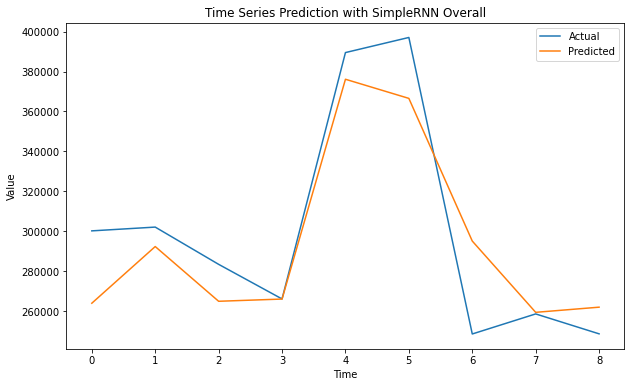

In [536]:
# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.legend()
plt.title('Time Series Prediction with SimpleRNN Overall')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [528]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, predicted_values)
print(f"MSE: {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

MSE: 578313038.8935816
RMSE: 24048.140029814815


In [529]:
from sklearn.metrics import mean_absolute_error
# Calculate MAE
mae = mean_absolute_error(y_test, predicted_values)
print(f"MAE: {mae}")

MAE: 18788.442708333332


<span style='color:Orange'> LSTM (Long Short-Term Memory) </span> <br>
MSE=5444520486.529081 <br>
RMSE=73786.99402014613 <br>
MAE=59720.437499999985 <br>

<span style='color:Orange'> Bidirectional RNN (Bidirectional Recurrent Neural Network) </span> <br>
MSE1=5729063167.366754 <br>
RMSE1=75690.57515547595 <br>
MAE1=61550.50694444446 <br>

<span style='color:Orange'> GRU (Gated Recurrent Unit) </span> <br>
MSE2=3379836794.701606 <br>
RMSE2=58136.36378981408 <br>
MAE2=44152.520833333336 <br>

<span style='color:Orange'> Vanilla RNN (Vanilla Recurrent Neural Network) </span> <br>
MSE3=883891900.419271 <br>
RMSE3=29730.31954788362 <br>
MAE2=24001.916666666653

### Vanilla Recurrent Neural Network Best Model

## Steps for future prediction

In [544]:
# Assuming 'sequence_length' is 12 and 'selected_column' is 'Grand Total'

# Take the last 'sequence_length' values from your original data
last_data = scaled_data[-sequence_length:]

# Reshape the data for prediction
last_data = last_data.reshape((1, last_data.shape[0], 1))

# Make future predictions
future_predictions = []
for i in range(10):  # Replace 'n' with the number of future time steps you want to predict, we use 10
    next_prediction = model.predict(last_data)  # Predict the next value
    future_predictions.append(next_prediction[0, 0])  # Append the next predicted value
    last_data = np.append(last_data[:, 1:, :], next_prediction.reshape(1, 1, 1), axis=1)  # Update last_data with the predicted value

# Inverse transform the predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Display the future predictions
print("Future Predictions:")
print(future_predictions)

Future Predictions:
[[111927.984]
 [121559.016]
 [120702.53 ]
 [133067.78 ]
 [142475.98 ]
 [135457.47 ]
 [128758.78 ]
 [131222.06 ]
 [132903.16 ]
 [139804.17 ]]


## Change in Approach: Predict for individual country

### Start with China

In [534]:
# Select the specific column for modeling
selected_column = 'China'
selected_data = data[[selected_column]]
# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_data)

# Split the data into sequences for time series modeling (assuming each month is a sequence)
sequence_length = 12
sequences = []
for i in range(len(scaled_data) - sequence_length):
    sequences.append(scaled_data[i:i+sequence_length])
sequences = np.array(sequences)

# Splitting data into train and test sets (85-15 split)
split = int(0.85 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

# Prepare train and test data - input and output
X_train = train_data[:, :-1]
y_train = train_data[:, -1]

X_test = test_data[:, :-1]
y_test = test_data[:, -1]

# Reshape input data to fit model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Set seed values for reproducibility
seed_value = 42
# 1. Set Python built-in random number generator
random.seed(seed_value)
# 2. Set NumPy random seed
np.random.seed(seed_value)
# 3. Set TensorFlow random seed
tf.random.set_seed(seed_value)
# 4. Force TensorFlow to use single thread for better reproducibility
os.environ['TF_DETERMINISTIC_OPS'] = '1'

model_China = Sequential()
model_China.add(SimpleRNN(units=100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_China.add(Dense(units=1))

# Compile the model
model_China.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model_China.fit(X_train, y_train, epochs=50, batch_size=32)
# Make predictions
predicted_values_China = model_China.predict(X_test)

# Inverse transform the predictions to the original scale
predicted_values_China = scaler.inverse_transform(predicted_values_China)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/50
2/2 [==============================] - 1s 4ms/step - loss: 0.1700
Epoch 2/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1041
Epoch 3/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0554
Epoch 4/50
2/2 [==============================] - 0s 5ms/step - loss: 0.0339
Epoch 5/50
2/2 [==============================] - 0s 5ms/step - loss: 0.0462
Epoch 6/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0390
Epoch 7/50
2/2 [==============================] - 0s 5ms/step - loss: 0.0297
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0302
Epoch 9/50
2/2 [==============================] - 0s 5ms/step - loss: 0.0296
Epoch 10/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0325
Epoch 11/50
2/2 [==============================] - 0s 5ms/step - loss: 0.0327
Epoch 12/50
2/2 [==============================] - 0s 5ms/step - loss: 0.0293
Epoch 13/50
2/2 [==============================] - 0s 5ms/step - loss: 0.

MSE: 578313038.8935816
RMSE: 24048.140029814815
MAE: 18788.442708333332


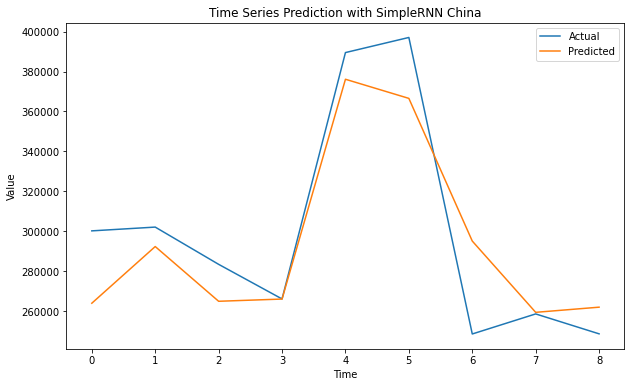

In [537]:
# Calculate MSE
mse = mean_squared_error(y_test, predicted_values_China)
print(f"MSE: {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

mae = mean_absolute_error(y_test, predicted_values_China)
print(f"MAE: {mae}")

# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predicted_values_China, label='Predicted')
plt.legend()
plt.title('Time Series Prediction with SimpleRNN China')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### Start with India

In [538]:
# Select the specific column for modeling
selected_column = 'India'
selected_data = data[[selected_column]]
# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_data)

# Split the data into sequences for time series modeling (assuming each month is a sequence)
sequence_length = 12
sequences = []
for i in range(len(scaled_data) - sequence_length):
    sequences.append(scaled_data[i:i+sequence_length])
sequences = np.array(sequences)

# Splitting data into train and test sets (85-15 split)
split = int(0.85 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

# Prepare train and test data - input and output
X_train = train_data[:, :-1]
y_train = train_data[:, -1]

X_test = test_data[:, :-1]
y_test = test_data[:, -1]

# Reshape input data to fit model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Set seed values for reproducibility
seed_value = 42
# 1. Set Python built-in random number generator
random.seed(seed_value)
# 2. Set NumPy random seed
np.random.seed(seed_value)
# 3. Set TensorFlow random seed
tf.random.set_seed(seed_value)
# 4. Force TensorFlow to use single thread for better reproducibility
os.environ['TF_DETERMINISTIC_OPS'] = '1'

model_India = Sequential()
model_India.add(SimpleRNN(units=100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_India.add(Dense(units=1))

# Compile the model
model_India.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model_India.fit(X_train, y_train, epochs=50, batch_size=32)
# Make predictions
predicted_values_India = model_India.predict(X_test)

# Inverse transform the predictions to the original scale
predicted_values_India = scaler.inverse_transform(predicted_values_India)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/50
2/2 [==============================] - 0s 3ms/step - loss: 0.0846
Epoch 2/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0504
Epoch 3/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0352
Epoch 4/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0373
Epoch 5/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0383
Epoch 6/50
2/2 [==============================] - 0s 5ms/step - loss: 0.0326
Epoch 7/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0301
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0285
Epoch 9/50
2/2 [==============================] - 0s 5ms/step - loss: 0.0258
Epoch 10/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0282
Epoch 11/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0249
Epoch 12/50
2/2 [==============================] - 0s 5ms/step - loss: 0.0198
Epoch 13/50
2/2 [==============================] - 0s 5ms/step - loss: 0.

MSE: 359497706.49920654
RMSE: 18960.424744694054
MAE: 13135.853298611111


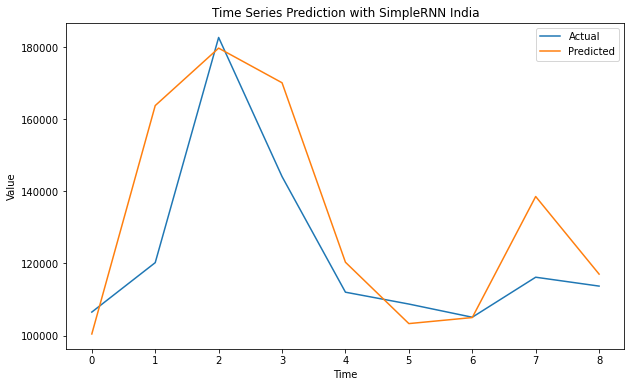

In [539]:
# Calculate MSE
mse = mean_squared_error(y_test, predicted_values_India)
print(f"MSE: {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

mae = mean_absolute_error(y_test, predicted_values_India)
print(f"MAE: {mae}")

# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predicted_values_India, label='Predicted')
plt.legend()
plt.title('Time Series Prediction with SimpleRNN India')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

#### Similar approach we can follow for rest of countires and define prediction model